House Price Prediction Using Linear Regression

Importing Libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 

Importing the Dataset

In [3]:
dataset = pd.read_csv('Housing.csv')
print(dataset)
x = dataset.iloc[:,1:].values 
y = dataset.iloc[:,0].values  #y-> dependent variable

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [4]:
print(x)
print(y)

[[7420 4 2 ... 2 'yes' 'furnished']
 [8960 4 4 ... 3 'no' 'furnished']
 [9960 3 2 ... 2 'yes' 'semi-furnished']
 ...
 [3620 2 1 ... 0 'no' 'unfurnished']
 [2910 3 1 ... 0 'no' 'furnished']
 [3850 3 1 ... 0 'no' 'unfurnished']]
[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  6615000  6580000  65100

Encoding Categorical Data

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[11])],remainder='passthrough')
x = np.array(ct.fit_transform(x)) 
print(x)
#furnished - 100
#semi - furnished -010
#unfurnished - 001

[[1.0 0.0 0.0 ... 'yes' 2 'yes']
 [1.0 0.0 0.0 ... 'yes' 3 'no']
 [0.0 1.0 0.0 ... 'no' 2 'yes']
 ...
 [0.0 0.0 1.0 ... 'no' 0 'no']
 [1.0 0.0 0.0 ... 'no' 0 'no']
 [0.0 0.0 1.0 ... 'no' 0 'no']]


Labelling the Column with yes/no 


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,7] = le.fit_transform(x[:,7])
x[:,8] = le.fit_transform(x[:,8])
x[:,9] = le.fit_transform(x[:,9])
x[:,10] = le.fit_transform(x[:,10])
x[:,11] = le.fit_transform(x[:,11])
x[:,13] = le.fit_transform(x[:,13])
print(x)


[[1.0 0.0 0.0 ... 1 2 1]
 [1.0 0.0 0.0 ... 1 3 0]
 [0.0 1.0 0.0 ... 0 2 1]
 ...
 [0.0 0.0 1.0 ... 0 0 0]
 [1.0 0.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 0 0 0]]


Applying scaling to All columns

In [7]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
x = sc1.fit_transform(x)
y = sc2.fit_transform(y.reshape(len(y),1))
print(x)
print(y)

[[ 1.70084013 -0.84488844 -0.6964292  ...  1.4726183   1.51769249
   1.80494113]
 [ 1.70084013 -0.84488844 -0.6964292  ...  1.4726183   2.67940935
  -0.55403469]
 [-0.58794474  1.18358821 -0.6964292  ... -0.67906259  1.51769249
   1.80494113]
 ...
 [-0.58794474 -0.84488844  1.43589615 ... -0.67906259 -0.80574124
  -0.55403469]
 [ 1.70084013 -0.84488844 -0.6964292  ... -0.67906259 -0.80574124
  -0.55403469]
 [-0.58794474 -0.84488844  1.43589615 ... -0.67906259 -0.80574124
  -0.55403469]]
[[ 4.56636513e+00]
 [ 4.00448405e+00]
 [ 4.00448405e+00]
 [ 3.98575468e+00]
 [ 3.55497918e+00]
 [ 3.25530927e+00]
 [ 2.88072189e+00]
 [ 2.88072189e+00]
 [ 2.73088693e+00]
 [ 2.69342819e+00]
 [ 2.69342819e+00]
 [ 2.62974834e+00]
 [ 2.43121702e+00]
 [ 2.39375829e+00]
 [ 2.39375829e+00]
 [ 2.31884081e+00]
 [ 2.31884081e+00]
 [ 2.24392333e+00]
 [ 2.20646459e+00]
 [ 2.18773522e+00]
 [ 2.13154711e+00]
 [ 2.09408838e+00]
 [ 2.07535901e+00]
 [ 2.07535901e+00]
 [ 2.03790027e+00]
 [ 2.01917090e+00]
 [ 1.97796629e

Splitting the Dataset into Training and Test Set

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

Fitting into Linear Regressor model 

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

Predicting the test set Results

In [10]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((sc2.inverse_transform(y_pred.reshape(len(y_pred),1)),sc2.inverse_transform(y_test.reshape(len(y_test),1))),1))

[[ 3938615.5   4585000.  ]
 [ 6105186.32  6083000.  ]
 [ 4517011.56  4007500.  ]
 [ 7194281.05  6930000.  ]
 [ 2776033.45  2940000.  ]
 [ 7064606.35  6195000.  ]
 [ 3226999.94  3535000.  ]
 [ 3230544.74  2940000.  ]
 [ 3442516.22  3500000.  ]
 [ 8280216.26  7980000.  ]
 [ 6614762.43  6755000.  ]
 [ 3697620.4   3990000.  ]
 [ 3838139.59  3150000.  ]
 [ 4578146.53  3290000.  ]
 [ 4020632.06  4130000.  ]
 [ 1902807.01  2660000.  ]
 [ 4070817.48  4410000.  ]
 [ 3693970.55  3710000.  ]
 [ 3240476.77  3360000.  ]
 [ 4608467.89  4270000.  ]
 [ 6001587.75  5005000.  ]
 [ 6403983.63  5383000.  ]
 [ 4772501.01  6440000.  ]
 [ 2676575.06  1890000.  ]
 [ 5278285.36  6125000.  ]
 [ 5720549.36  5460000.  ]
 [ 5389815.86  5803000.  ]
 [ 5642182.65  4620000.  ]
 [ 5753398.    5530000.  ]
 [ 5738166.36  5950000.  ]
 [ 3399350.27  4305000.  ]
 [ 6415213.4   3640000.  ]
 [ 7142655.98  5250000.  ]
 [ 2916657.7   3325000.  ]
 [ 4461351.36  3703000.  ]
 [ 5250946.42  4753000.  ]
 [ 5055574.43  9100000.  ]
 

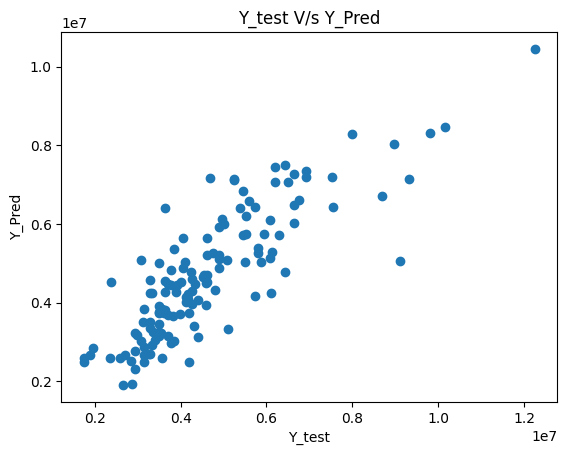

In [11]:
plt.scatter(sc2.inverse_transform(y_test),sc2.inverse_transform(y_pred))
plt.xlabel('Y_test')
plt.ylabel('Y_Pred')
plt.title('Y_test V/s Y_Pred')
plt.show()

r2_score

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6952634701072584